## Задание 1. Использование тепловых карт для поиска шаблонов в данных о пассажирах рейса

В этом задании мы будем использовать тепловую карту, чтобы найти закономерности в данных о пассажирах рейса:
1. С помощью pandas считывать данные, расположенные в подкаталоге. Данный набор данных содержит ежемесячные данные по пассажирам рейсов за период с 2001 по 2012 год.
2. Используйте тепловую карту для визуализации данных.
3. Используйте собственную цветную карту. Убедитесь, что наименьшее значение - самый темный цвет, а наибольшее - самый яркий.

In [1]:
!pip install squarify

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify

In [3]:
df = pd.read_csv('data/flight_details.csv')
df.head()

,Years,Months,Passengers
0,2001,January,112
1,2001,February,118
2,2001,March,132
3,2001,April,129
4,2001,May,121


In [4]:
df = df.pivot('Months', 'Years', 'Passengers')
df.head()

Years,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Months,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417


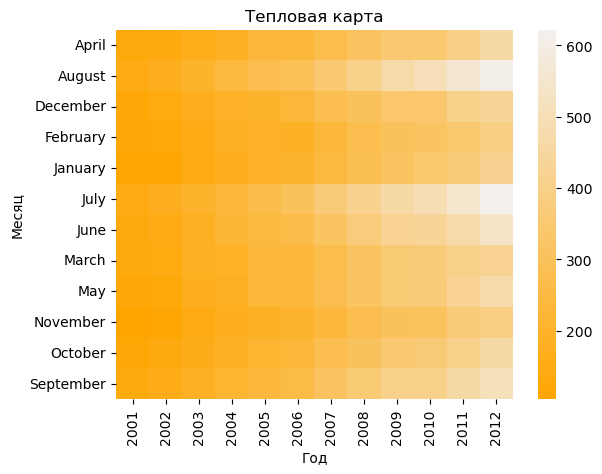

In [5]:
sns.heatmap(df, cmap=sns.light_palette('orange', as_cmap=True, reverse=True))

plt.xlabel('Год')
plt.ylabel('Месяц')
plt.title('Тепловая карта')
plt.show()

## Задание 2. Пересмотр сравнения фильмов

В этом упражнении мы будем использовать сюжет бара для сравнения баллов фильмов. Вам будут предложены пять фильмов с оценкой "Гнилые помидоры". Томатометр - это процент от одобренных критиков Томатометра, которые дали положительный отзыв на фильм. Оценка зрительских симпатий - это процент пользователей, которые дали оценку 3,5 или выше из 5. Сравните эти два балла среди пяти фильмов:
1. Используйте pandas для чтения данных, расположенных в подпапках.
2. Преобразовать данные в удобный для использования формат для функции построения гистограммы Seaborn.
3. Использовать Seaborn для создания визуально привлекательного графика баров, который сравнивает две оценки для всех пяти фильмов.

In [6]:
df = pd.read_csv('data/movie_scores.csv')
df.head()

,Unnamed: 0,MovieTitle,Tomatometer,AudienceScore
0,0,The Shape of Water,91,73
1,1,Black Panther,97,79
2,2,Dunkirk,92,81
3,3,The Martian,91,91
4,4,The Hobbit: An Unexpected Journey,64,83


In [7]:
df = pd.DataFrame(
    {
        'Фильм': list(df['MovieTitle']) * 2,
        'Счет': list(df['AudienceScore']) + list(df['Tomatometer']),
        'Тип': ['Audience Score'] * len(df['AudienceScore']) + ['Tomatometer'] * len(df['Tomatometer'])
    }
)
df.head()

,Фильм,Счет,Тип
0,The Shape of Water,73,Audience Score
1,Black Panther,79,Audience Score
2,Dunkirk,81,Audience Score
3,The Martian,91,Audience Score
4,The Hobbit: An Unexpected Journey,83,Audience Score


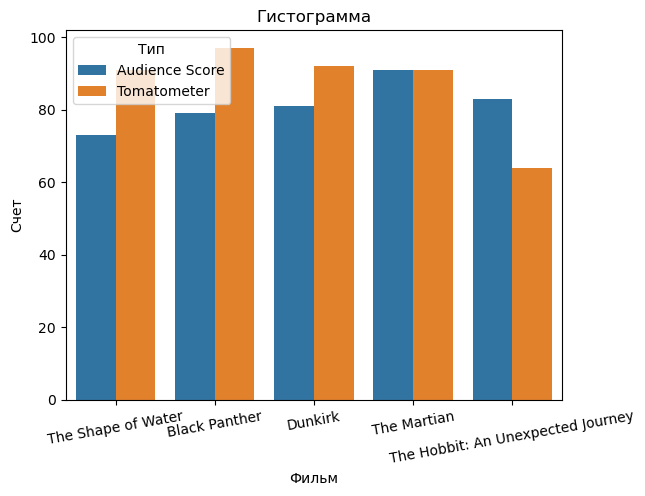

In [8]:
sns.barplot(x='Фильм', y='Счет', hue='Тип', data=df)

plt.xticks(rotation=10)
plt.xlabel('Фильм')
plt.ylabel('Счет')
plt.title('Гистограмма')
plt.show()

## Задание 3. Просмотр водопользования

В этом упражнении мы будем использовать карту-дерево для визуализации процентного соотношения воды, используемой для различных целей:
1. C помощью pandas считывать данные, расположенные в подпапке.
2. Использовать карту дерева для визуализации использования воды.
3. Показывать проценты для каждой плитки и добавлять заголовок.

In [9]:
df = pd.read_csv('data/water_usage.csv')
df.head()

,Unnamed: 0,Usage,Percentage
0,0,Leak,12
1,1,Clothes Washer,17
2,2,Faucet,19
3,3,Shower,20
4,4,Toilet,24


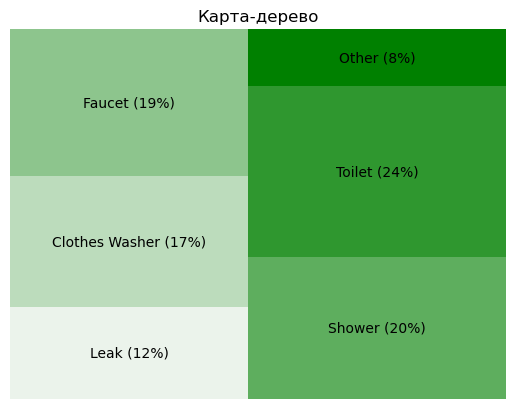

In [10]:
squarify.plot(
    sizes=df['Percentage'],
    label=df['Usage'] + ' (' + df['Percentage'].astype('str') + '%)',
    color=sns.light_palette('green', df.shape[0])
)

plt.axis('off')
plt.title('Карта-дерево')
plt.show()

## Дополнительное задание

Слева штаты, снизу процент диабетиков по годам в данном штате. Диаграмма - тепловая карта

In [11]:
df = pd.read_csv('data/diabetes_dataset.csv')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [12]:
grouped_df = df.groupby(['location', 'year', 'diabetes']).size().unstack(level='year').fillna(0)
grouped_df.head()

year                2015   2016  2018    2019  2020  2021  2022
location diabetes                                              
Alabama  0         155.0  150.0  45.0  1510.0   1.0   0.0   0.0
         1          13.0   18.0   5.0   139.0   0.0   0.0   0.0
Alaska   0         151.0  157.0  47.0  1505.0   2.0   0.0   0.0
         1          17.0   11.0   3.0   142.0   0.0   0.0   0.0
Arizona  0         151.0  156.0  47.0  1490.0   0.0   1.0   1.0

In [13]:
diabetes_percent = []
columns = grouped_df.columns.tolist()

for (location, diabetes), row in grouped_df.iterrows():
    if diabetes == 0:
        diabetes_percent.append(list(map(lambda column: row[column], columns)))
        next

    for index, column in enumerate(columns):
        diabetes_count = row[column]
        not_diabetes_count = diabetes_percent[-1][index]

        total = diabetes_count + not_diabetes_count
        diabetes_percent[-1][index] = diabetes_count * 100 / total if total > 0 else 0

In [14]:
current_row_index = 0
df = df.groupby(['location', 'year']).size().unstack(level='year')

for _, row in df.iterrows():
    arr = diabetes_percent[current_row_index]
    for index, column in enumerate(columns):
        row[column] = arr[index]
    
    current_row_index += 1

df.head()

year,2015,2016,2018,2019,2020,2021,2022
location,,,,,,,
Alabama,20.634921,26.470588,9.090909,73.544974,0.0,0.000000,0.0
Alaska,25.373134,18.032787,5.660377,73.958333,0.0,0.000000,0.0
Arizona,25.373134,19.354839,5.660377,68.354430,0.0,0.000000,0.0
Arkansas,15.254237,16.666667,12.280702,74.489796,0.0,1.960784,0.0
California,28.571429,9.090909,12.280702,72.067039,0.0,0.000000,0.0


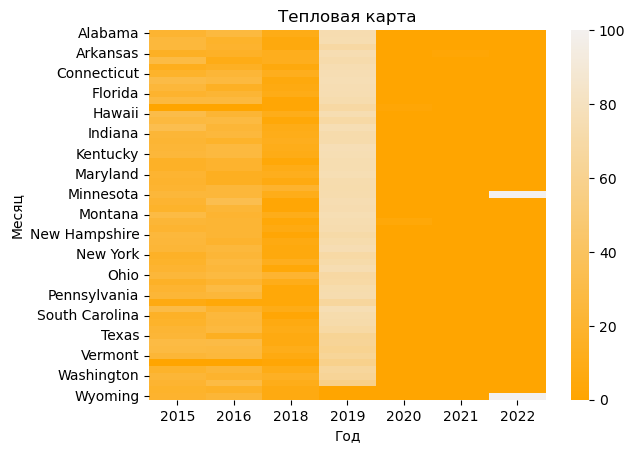

In [15]:
sns.heatmap(df, cmap=sns.light_palette('orange', as_cmap=True, reverse=True))

plt.xlabel('Год')
plt.ylabel('Месяц')
plt.title('Тепловая карта')
plt.show()